# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby("type").count()['ride_id']


In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby("type").sum()['fare']

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares/total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares/total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_df = pd.DataFrame(
    {"Total Rides": total_rides,
     "Total Drivers": total_drivers,
     "Total Fares": total_fares,
     "Average Fare per Ride": average_fare_per_ride,
     "Average Fare per Driver": average_fare_per_driver})
pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_df.index.name = None
pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,$13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,$20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,$11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,$44.94,4256853490277,4,Rural


In [34]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fare_by_type = pyber_data_df.groupby(['type', 'date']).sum(['fare'])
sum_fare_by_type

index   fare        ride_id  driver_count
type  date                                                          
Rural 2019-01-01 09:45:36   2265 $43.69  2424875833354             1
      2019-01-02 11:18:32   2264 $52.12  3454018971635             1
      2019-01-03 19:51:01   2355 $19.90  5559509612597             8
      2019-01-04 03:31:26   2288 $24.88  4195619112933             8
      2019-01-06 07:38:40   2286 $47.33  3849747342021             4
...                          ...    ...            ...           ...
Urban 2019-05-08 04:20:00    638 $21.99   117997692054            52
      2019-05-08 04:39:49   1205 $18.45  1811574736337            11
      2019-05-08 07:29:01   1548 $18.55  5682021476085            33
      2019-05-08 11:38:35   1015 $19.77  7837163332630             4
      2019-05-08 13:10:18   1302 $18.04  5616262558026            58

[2375 rows x 4 columns]

In [35]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fare_by_type = sum_fare_by_type.reset_index()


In [40]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fare_by_type_pivot = sum_fare_by_type.pivot(
    index = 'date',
    columns = 'type', 
    values = 'fare')

sum_fare_by_type_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [38]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_April = sum_fare_by_type_pivot.loc['2019-01-01':'2019-04-28']
fares_Jan_April

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,NaN,NaN
2019-04-27 19:45:48,NaN,$28.84,NaN
2019-04-27 20:41:36,NaN,NaN,$8.28


In [42]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sum_fare_by_type_pivot.index = pd.to_datetime(sum_fare_by_type_pivot.index)

In [43]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_fare_by_type_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [51]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_df = sum_fare_by_type_pivot.resample('W').sum()
weekly_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


<Figure size 3600x360 with 0 Axes>

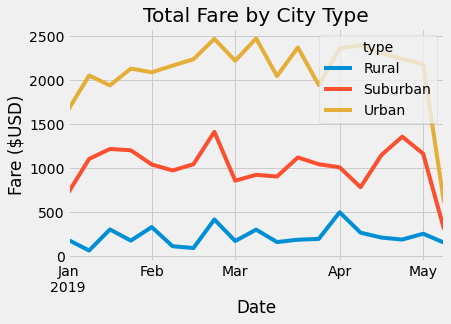

<Figure size 3600x360 with 0 Axes>

In [62]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_df.plot()
plt.title("Total Fare by City Type")
plt.xlabel("Date")
plt.ylabel("Fare ($USD)")